# Deep learning - Una introducción a Keras

## Preparación de datos

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 12)                60        
                                                                 
 dense_184 (Dense)           (None, 8)                 104       
                                                                 
 dense_185 (Dense)           (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/150
10/10 [==============================] - 2s 56ms/step - loss: 0.4283 - accuracy: 0.3542 - val_loss: 0.5243 - val_accuracy: 0.2083
Epoch 2/150
10/10 [==============================] - 0s 11ms/step - loss: 0.4281 - accuracy: 0.3542 - val_loss: 0.5241 - val_accurac

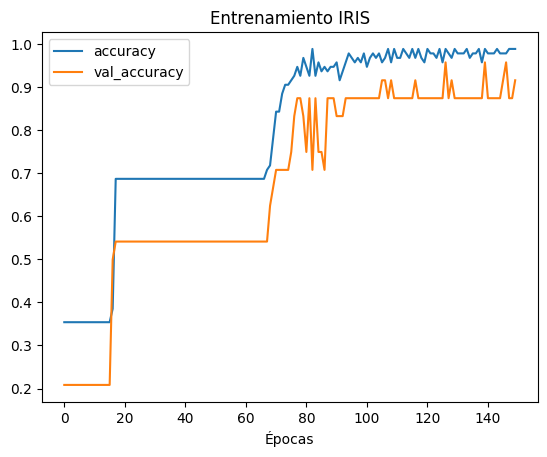

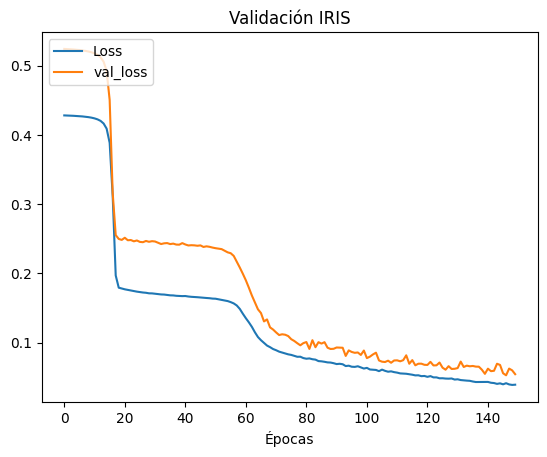

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_40",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_183_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_183",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 12,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name":

In [63]:
# cargar el dataset
import pandas as pd
import	os
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
# leer el dataset con pandas
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
# Separar datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed) 

# Separar datos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu'))  # 4 características de entrada
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 clases en salida
print(model.summary())

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) # tasa de aprendizaje

model.compile(optimizer=optimizer, loss='MSE', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=10, validation_data=(x_val, y_val))

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Entrenamiento IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()


# Print validation accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())



import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")
        


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 64)                320       
                                                                 
 dense_187 (Dense)           (None, 32)                2080      
                                                                 
 dense_188 (Dense)           (None, 16)                528       
                                                                 
 dense_189 (Dense)           (None, 3)                 51        
                                                                 
 dropout_67 (Dropout)        (None, 3)                 0         
                                                                 
 dense_190 (Dense)           (None, 3)                 12        
                                                                 
Total params: 2991 (11.68 KB)
Trainable params: 2991 

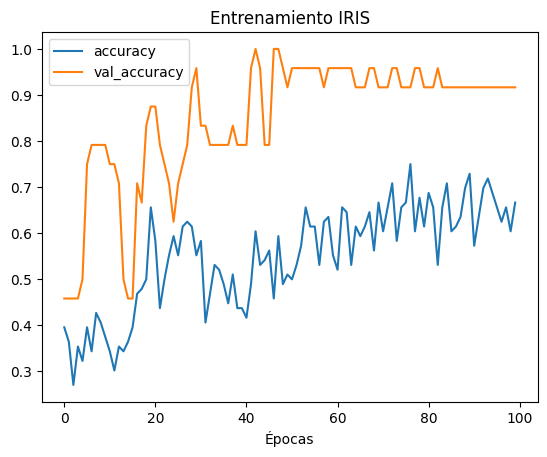

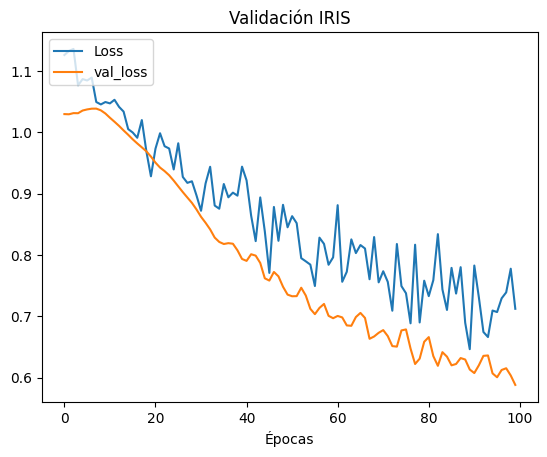

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_41",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_186_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_186",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 64,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name":

In [64]:
# cargar el dataset
import pandas as pd
import	os
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
# leer el dataset con pandas
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
# Separar datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed) 

# Separar datos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

from keras.layers import Dropout

# Dropout se debe aplicar entre capas, no al final
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
print(model.summary())


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Entrenamiento IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()


# Print validation accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model2.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())



import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")
        


Epoch 1/100
3/3 - 3s - loss: 2.6482 - accuracy: 0.3021 - val_loss: 1.0708 - val_accuracy: 0.4583 - 3s/epoch - 840ms/step
Epoch 2/100
3/3 - 0s - loss: 2.2909 - accuracy: 0.3542 - val_loss: 0.9688 - val_accuracy: 0.4583 - 78ms/epoch - 26ms/step
Epoch 3/100
3/3 - 0s - loss: 2.0436 - accuracy: 0.3125 - val_loss: 0.9028 - val_accuracy: 0.5417 - 78ms/epoch - 26ms/step
Epoch 4/100
3/3 - 0s - loss: 1.7945 - accuracy: 0.3646 - val_loss: 0.8790 - val_accuracy: 0.7500 - 60ms/epoch - 20ms/step
Epoch 5/100
3/3 - 0s - loss: 1.6014 - accuracy: 0.4375 - val_loss: 0.8929 - val_accuracy: 0.7917 - 104ms/epoch - 35ms/step
Epoch 6/100
3/3 - 0s - loss: 1.8261 - accuracy: 0.3021 - val_loss: 0.9286 - val_accuracy: 0.7917 - 86ms/epoch - 29ms/step
Epoch 7/100
3/3 - 0s - loss: 1.5255 - accuracy: 0.3229 - val_loss: 0.9758 - val_accuracy: 0.6667 - 72ms/epoch - 24ms/step
Epoch 8/100
3/3 - 0s - loss: 1.5808 - accuracy: 0.3646 - val_loss: 1.0218 - val_accuracy: 0.5417 - 97ms/epoch - 32ms/step
Epoch 9/100
3/3 - 0s - l

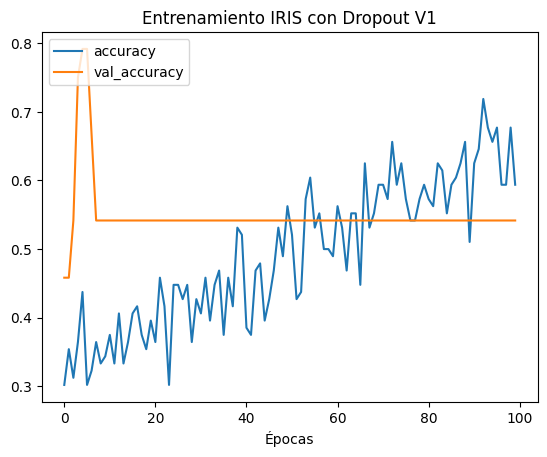

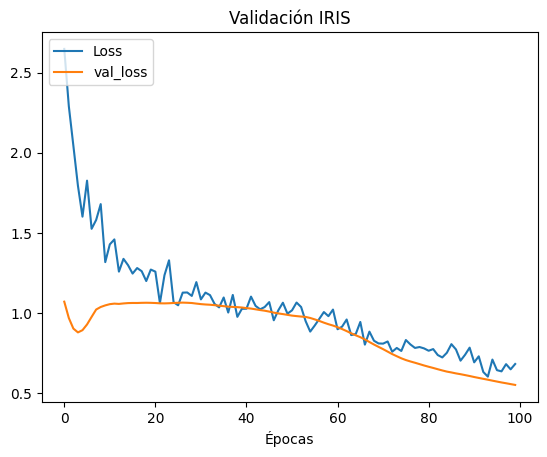

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_43",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_195_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_195",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 64,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name":

In [66]:
# Cargar librerías
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))  # Ajustar la tasa de Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout V1')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Print validation accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model3.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())



import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")
        


Epoch 1/100
3/3 - 2s - loss: 1.1462 - accuracy: 0.4167 - val_loss: 1.0817 - val_accuracy: 0.5417 - 2s/epoch - 694ms/step
Epoch 2/100
3/3 - 0s - loss: 1.0312 - accuracy: 0.4896 - val_loss: 1.0355 - val_accuracy: 0.5417 - 65ms/epoch - 22ms/step
Epoch 3/100
3/3 - 0s - loss: 1.0697 - accuracy: 0.4479 - val_loss: 0.9975 - val_accuracy: 0.5833 - 61ms/epoch - 20ms/step
Epoch 4/100
3/3 - 0s - loss: 1.0159 - accuracy: 0.5521 - val_loss: 0.9666 - val_accuracy: 0.7500 - 65ms/epoch - 22ms/step
Epoch 5/100
3/3 - 0s - loss: 1.0108 - accuracy: 0.5104 - val_loss: 0.9430 - val_accuracy: 0.7500 - 69ms/epoch - 23ms/step
Epoch 6/100
3/3 - 0s - loss: 0.9733 - accuracy: 0.5000 - val_loss: 0.9229 - val_accuracy: 0.7500 - 60ms/epoch - 20ms/step
Epoch 7/100
3/3 - 0s - loss: 0.9947 - accuracy: 0.5312 - val_loss: 0.9067 - val_accuracy: 0.6667 - 70ms/epoch - 23ms/step
Epoch 8/100
3/3 - 0s - loss: 0.9461 - accuracy: 0.6042 - val_loss: 0.8932 - val_accuracy: 0.5833 - 70ms/epoch - 23ms/step
Epoch 9/100
3/3 - 0s - lo

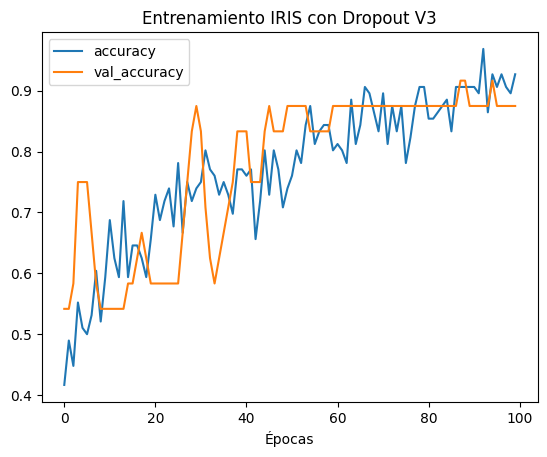

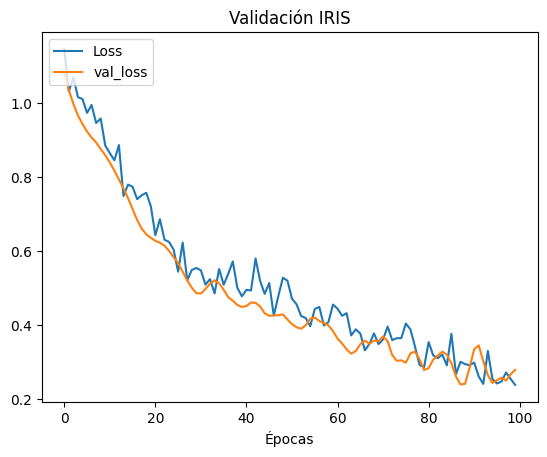

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_44",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_199_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_199",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 64,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name":

In [67]:
# Cargar librerías
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))  # Ajustar la tasa de Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout V3')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Print validation accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()


# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model4.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())




import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")
        


Epoch 1/50
2/2 - 2s - loss: 1.0676 - accuracy: 0.4167 - val_loss: 1.0792 - val_accuracy: 0.5417 - 2s/epoch - 930ms/step
Epoch 2/50
2/2 - 0s - loss: 1.0552 - accuracy: 0.4167 - val_loss: 1.0108 - val_accuracy: 0.5417 - 62ms/epoch - 31ms/step
Epoch 3/50
2/2 - 0s - loss: 1.0587 - accuracy: 0.5000 - val_loss: 1.0053 - val_accuracy: 0.5417 - 74ms/epoch - 37ms/step
Epoch 4/50
2/2 - 0s - loss: 0.9868 - accuracy: 0.5417 - val_loss: 0.9759 - val_accuracy: 0.5417 - 86ms/epoch - 43ms/step
Epoch 5/50
2/2 - 0s - loss: 0.9367 - accuracy: 0.5833 - val_loss: 0.9210 - val_accuracy: 0.5417 - 66ms/epoch - 33ms/step
Epoch 6/50
2/2 - 0s - loss: 0.8964 - accuracy: 0.5625 - val_loss: 0.8995 - val_accuracy: 0.5417 - 70ms/epoch - 35ms/step
Epoch 7/50
2/2 - 0s - loss: 0.8398 - accuracy: 0.6146 - val_loss: 0.8848 - val_accuracy: 0.5417 - 70ms/epoch - 35ms/step
Epoch 8/50
2/2 - 0s - loss: 0.8770 - accuracy: 0.5833 - val_loss: 0.8176 - val_accuracy: 0.5417 - 73ms/epoch - 36ms/step
Epoch 9/50
2/2 - 0s - loss: 0.871

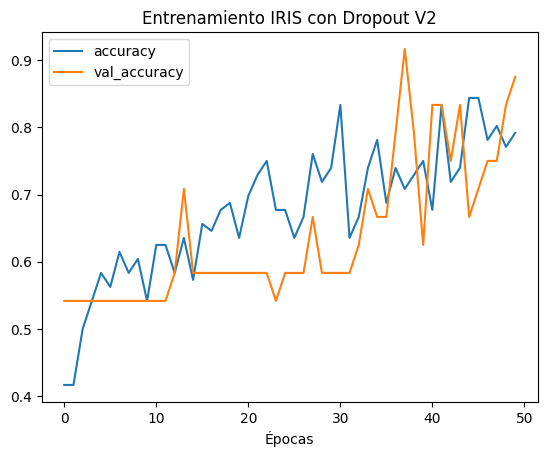

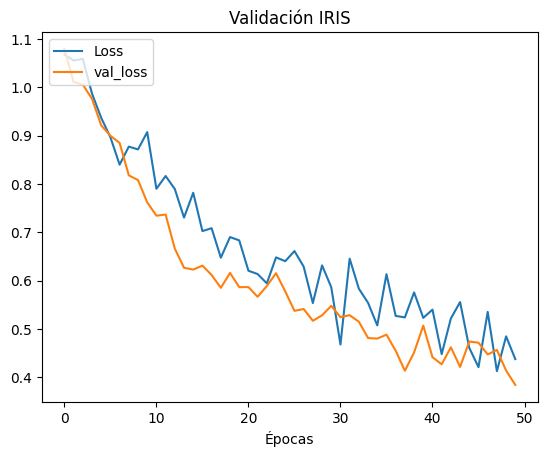

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_45",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_203_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_203",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 128,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name"

In [68]:
# Cargar librerías
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout V2')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Print validation accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()


# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model5.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())


import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")
        


Epoch 1/50
2/2 - 2s - loss: 1.2524 - accuracy: 0.2396 - val_loss: 1.0283 - val_accuracy: 0.7917 - 2s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 1.1415 - accuracy: 0.3438 - val_loss: 1.0019 - val_accuracy: 0.7917 - 77ms/epoch - 39ms/step
Epoch 3/50
2/2 - 0s - loss: 1.0833 - accuracy: 0.3542 - val_loss: 0.9739 - val_accuracy: 0.8750 - 76ms/epoch - 38ms/step
Epoch 4/50
2/2 - 0s - loss: 1.0238 - accuracy: 0.4583 - val_loss: 0.9338 - val_accuracy: 0.5417 - 90ms/epoch - 45ms/step
Epoch 5/50
2/2 - 0s - loss: 0.9440 - accuracy: 0.5312 - val_loss: 0.8876 - val_accuracy: 0.5417 - 75ms/epoch - 38ms/step
Epoch 6/50
2/2 - 0s - loss: 0.9973 - accuracy: 0.4688 - val_loss: 0.8376 - val_accuracy: 0.5417 - 70ms/epoch - 35ms/step
Epoch 7/50
2/2 - 0s - loss: 0.8707 - accuracy: 0.5625 - val_loss: 0.7939 - val_accuracy: 0.5417 - 93ms/epoch - 47ms/step
Epoch 8/50
2/2 - 0s - loss: 0.8161 - accuracy: 0.5833 - val_loss: 0.7347 - val_accuracy: 0.5417 - 81ms/epoch - 41ms/step
Epoch 9/50
2/2 - 0s - loss: 0.8081 -

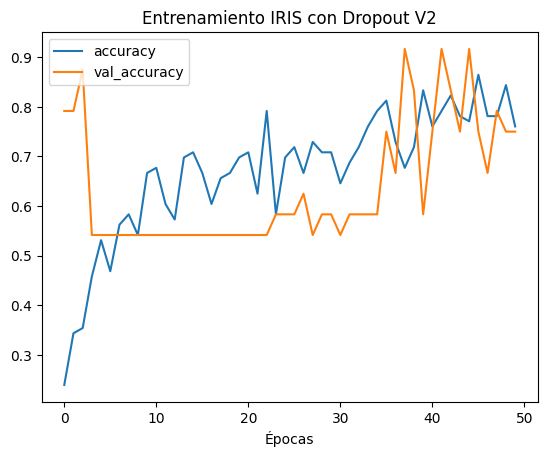

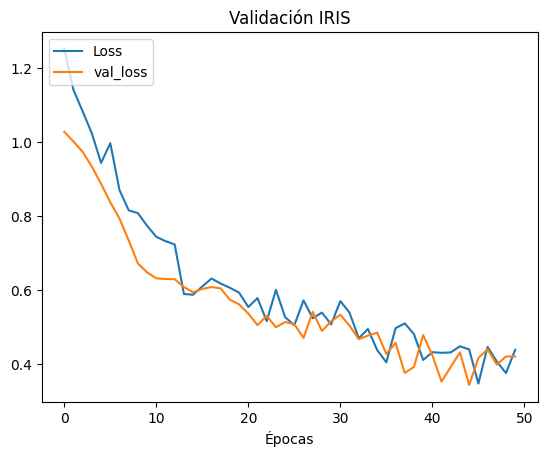

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_46",
    "layers": [
      {
        "module": "keras.layers",
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_208_input"
        },
        "registered_name": null
      },
      {
        "module": "keras.layers",
        "class_name": "Dense",
        "config": {
          "name": "dense_208",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 128,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name"

In [69]:
# Cargar librerías
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20% y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo con el optimizador RMSprop
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout V2')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Imprimir la precisión de la validación
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model6.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())

import numpy as np

# Convertir y_test a un array numérico de numpy
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")


Epoch 1/50
3/3 - 2s - loss: 1.4062 - accuracy: 0.2812 - val_loss: 1.0656 - val_accuracy: 0.5417 - 2s/epoch - 797ms/step
Epoch 2/50
3/3 - 0s - loss: 1.0027 - accuracy: 0.4792 - val_loss: 0.9298 - val_accuracy: 0.5417 - 72ms/epoch - 24ms/step
Epoch 3/50
3/3 - 0s - loss: 0.9299 - accuracy: 0.5833 - val_loss: 0.6650 - val_accuracy: 0.6667 - 84ms/epoch - 28ms/step
Epoch 4/50
3/3 - 0s - loss: 0.8450 - accuracy: 0.5417 - val_loss: 0.6635 - val_accuracy: 0.5417 - 78ms/epoch - 26ms/step
Epoch 5/50
3/3 - 0s - loss: 0.7923 - accuracy: 0.5833 - val_loss: 0.6362 - val_accuracy: 0.5417 - 89ms/epoch - 30ms/step
Epoch 6/50
3/3 - 0s - loss: 0.6436 - accuracy: 0.6458 - val_loss: 0.5406 - val_accuracy: 0.5833 - 72ms/epoch - 24ms/step
Epoch 7/50
3/3 - 0s - loss: 0.5879 - accuracy: 0.6979 - val_loss: 0.6968 - val_accuracy: 0.5417 - 73ms/epoch - 24ms/step
Epoch 8/50
3/3 - 0s - loss: 0.7727 - accuracy: 0.5938 - val_loss: 0.5801 - val_accuracy: 0.5417 - 81ms/epoch - 27ms/step
Epoch 9/50
3/3 - 0s - loss: 0.569

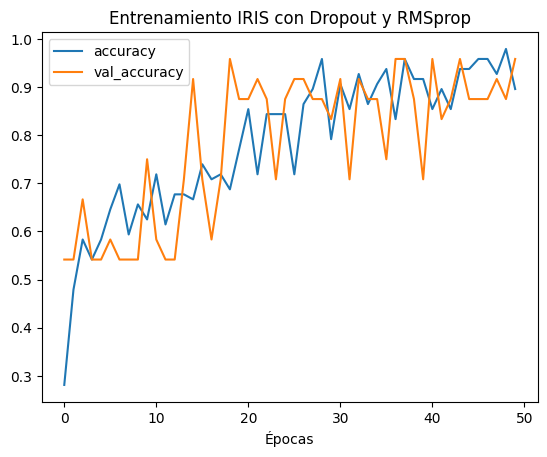

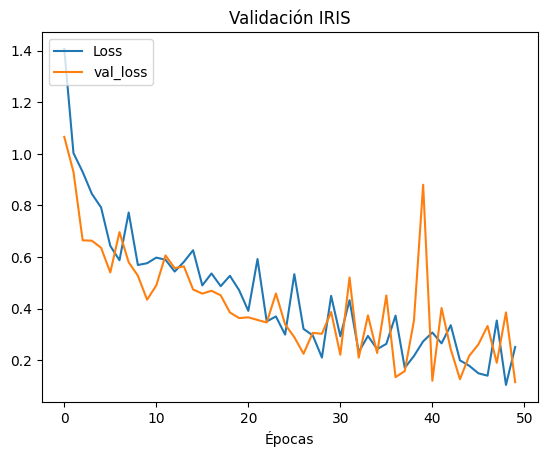

1/1 [==============================] - 0s 155ms/step
[0.00118254 0.95289975 0.04591775] -> [False  True False]
✓ Correcto
[9.9999988e-01 1.2026398e-07 9.9644737e-12] -> [ True False False]
✓ Correcto
[1.7148552e-10 1.6424934e-03 9.9835747e-01] -> [False False  True]
✓ Correcto
[0.00176177 0.94157666 0.05666161] -> [False  True False]
✓ Correcto
[6.0826144e-04 9.6693760e-01 3.2454208e-02] -> [False  True False]
✓ Correcto
[9.9999940e-01 6.0225051e-07 1.0100253e-10] -> [ True False False]
✓ Correcto
[5.8728916e-04 9.7779477e-01 2.1617932e-02] -> [False  True False]
✓ Correcto
[7.7101628e-05 2.5216612e-01 7.4775672e-01] -> [False False  True]
✓ Correcto
[0.00104909 0.8507703  0.1481806 ] -> [False  True False]
✓ Correcto
[6.7833613e-04 9.7336394e-01 2.5957767e-02] -> [False  True False]
✓ Correcto
[3.2510163e-04 4.9212709e-01 5.0754786e-01] -> [False False  True]
✓ Correcto
[9.9999845e-01 1.5296682e-06 4.3504397e-10] -> [ True False False]
✓ Correcto
[9.999999e-01 7.688370e-08 5.232423e-1

In [58]:
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20%, y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo con RMSprop y una tasa de aprendizaje diferente
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout y RMSprop')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Imprimir la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

# Guardar el modelo en formato JSON
json_string = model.to_json()
json_path = os.path.join(FOLDER, 'iris_model7.json')
with open(json_path, 'w') as json_file:
    json_file.write(json_string)


# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())



# Convertir y_test a un array numérico de numpy
import numpy as np
y_test = np.array(y_test)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Imprimir las predicciones y las etiquetas reales
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print("✓ Correcto")
    else:
        print("✘ Incorrecto")


Epoch 1/50
3/3 - 3s - loss: 1.1846 - accuracy: 0.3229 - val_loss: 1.0894 - val_accuracy: 0.2917 - 3s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 1.1358 - accuracy: 0.3021 - val_loss: 1.0791 - val_accuracy: 0.1667 - 281ms/epoch - 94ms/step
Epoch 3/50
3/3 - 0s - loss: 1.1564 - accuracy: 0.2500 - val_loss: 1.0676 - val_accuracy: 0.6250 - 148ms/epoch - 49ms/step
Epoch 4/50
3/3 - 0s - loss: 1.1378 - accuracy: 0.3125 - val_loss: 1.0598 - val_accuracy: 0.7083 - 202ms/epoch - 67ms/step
Epoch 5/50
3/3 - 0s - loss: 1.1160 - accuracy: 0.2917 - val_loss: 1.0547 - val_accuracy: 0.7083 - 101ms/epoch - 34ms/step
Epoch 6/50
3/3 - 0s - loss: 1.0128 - accuracy: 0.5000 - val_loss: 1.0457 - val_accuracy: 0.6667 - 96ms/epoch - 32ms/step
Epoch 7/50
3/3 - 0s - loss: 1.0780 - accuracy: 0.3542 - val_loss: 1.0420 - val_accuracy: 0.6250 - 98ms/epoch - 33ms/step
Epoch 8/50
3/3 - 0s - loss: 1.0532 - accuracy: 0.4167 - val_loss: 1.0305 - val_accuracy: 0.5833 - 102ms/epoch - 34ms/step
Epoch 9/50
3/3 - 0s - loss: 1.0

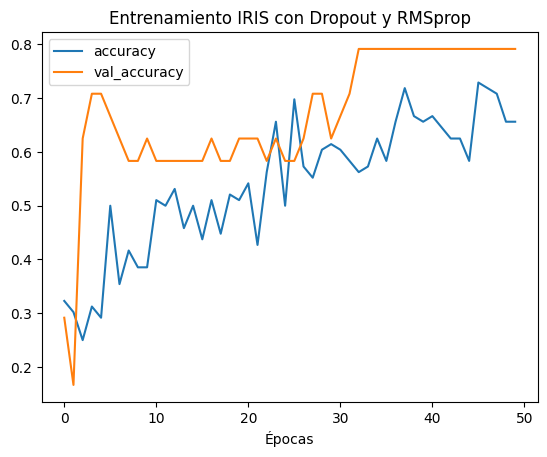

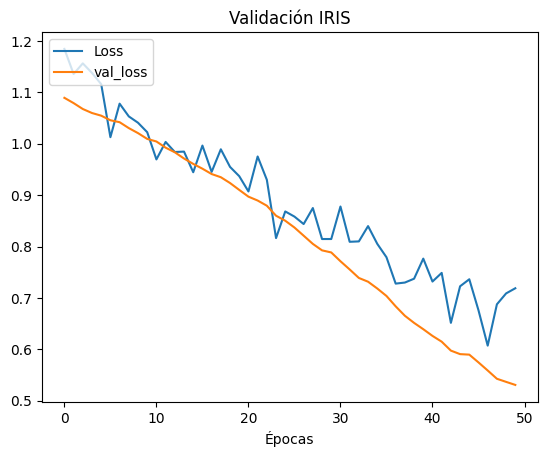

In [59]:
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Normalizar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20%, y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo con RMSprop y una tasa de aprendizaje diferente
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout y RMSprop')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Imprimir la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()


Epoch 1/50
3/3 - 3s - loss: 1.1764 - accuracy: 0.3333 - val_loss: 1.0918 - val_accuracy: 0.4583 - 3s/epoch - 987ms/step
Epoch 2/50
3/3 - 0s - loss: 1.1496 - accuracy: 0.3542 - val_loss: 1.0911 - val_accuracy: 0.4167 - 106ms/epoch - 35ms/step
Epoch 3/50
3/3 - 0s - loss: 1.1290 - accuracy: 0.3854 - val_loss: 1.0886 - val_accuracy: 0.4167 - 89ms/epoch - 30ms/step
Epoch 4/50
3/3 - 0s - loss: 1.1397 - accuracy: 0.3021 - val_loss: 1.0840 - val_accuracy: 0.4167 - 168ms/epoch - 56ms/step
Epoch 5/50
3/3 - 0s - loss: 1.1662 - accuracy: 0.2812 - val_loss: 1.0776 - val_accuracy: 0.4167 - 142ms/epoch - 47ms/step
Epoch 6/50
3/3 - 0s - loss: 1.1144 - accuracy: 0.3229 - val_loss: 1.0707 - val_accuracy: 0.4167 - 119ms/epoch - 40ms/step
Epoch 7/50
3/3 - 0s - loss: 1.0878 - accuracy: 0.3646 - val_loss: 1.0635 - val_accuracy: 0.4583 - 156ms/epoch - 52ms/step
Epoch 8/50
3/3 - 0s - loss: 1.1054 - accuracy: 0.3750 - val_loss: 1.0569 - val_accuracy: 0.5000 - 119ms/epoch - 40ms/step
Epoch 9/50
3/3 - 0s - loss:

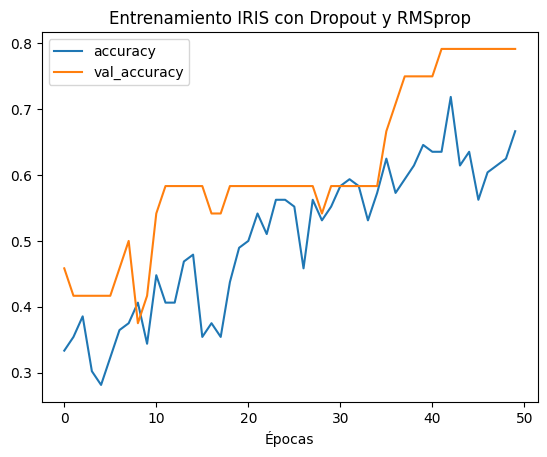

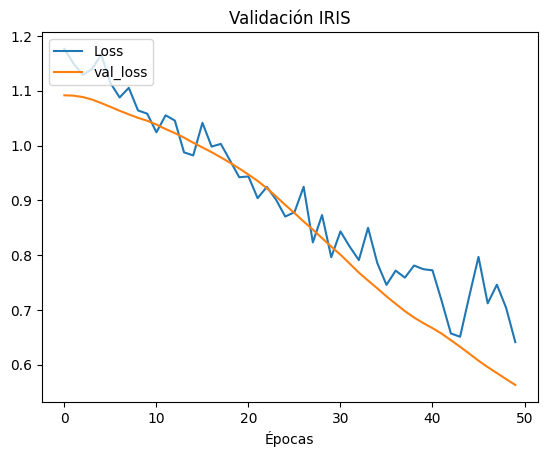

In [60]:
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Normalizar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20%, y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo con otro optimizador (Adam) y tasa de aprendizaje diferente
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=2)


# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout y RMSprop')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Imprimir la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()


Epoch 1/50
3/3 - 3s - loss: 1.1526 - accuracy: 0.2812 - val_loss: 1.0743 - val_accuracy: 0.5417 - 3s/epoch - 992ms/step
Epoch 2/50
3/3 - 0s - loss: 1.1551 - accuracy: 0.2917 - val_loss: 1.0621 - val_accuracy: 0.7083 - 72ms/epoch - 24ms/step
Epoch 3/50
3/3 - 0s - loss: 1.0888 - accuracy: 0.3646 - val_loss: 1.0559 - val_accuracy: 0.6250 - 70ms/epoch - 23ms/step
Epoch 4/50
3/3 - 0s - loss: 1.0887 - accuracy: 0.4271 - val_loss: 1.0514 - val_accuracy: 0.6250 - 80ms/epoch - 27ms/step
Epoch 5/50
3/3 - 0s - loss: 1.0727 - accuracy: 0.4479 - val_loss: 1.0456 - val_accuracy: 0.7083 - 67ms/epoch - 22ms/step
Epoch 6/50
3/3 - 0s - loss: 1.0570 - accuracy: 0.3854 - val_loss: 1.0360 - val_accuracy: 0.7500 - 99ms/epoch - 33ms/step
Epoch 7/50
3/3 - 0s - loss: 1.0546 - accuracy: 0.4271 - val_loss: 1.0258 - val_accuracy: 0.7500 - 109ms/epoch - 36ms/step
Epoch 8/50
3/3 - 0s - loss: 1.0173 - accuracy: 0.4062 - val_loss: 1.0155 - val_accuracy: 0.7500 - 99ms/epoch - 33ms/step
Epoch 9/50
3/3 - 0s - loss: 1.03

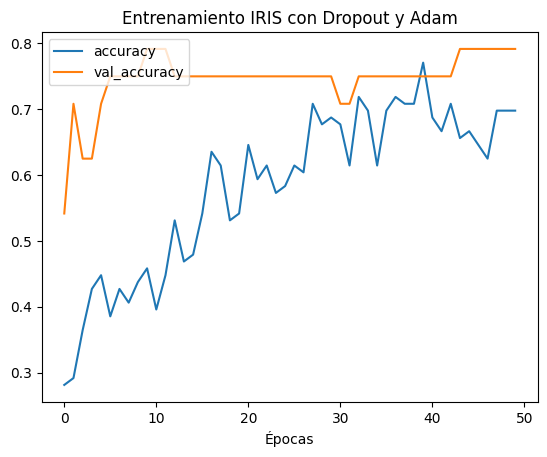

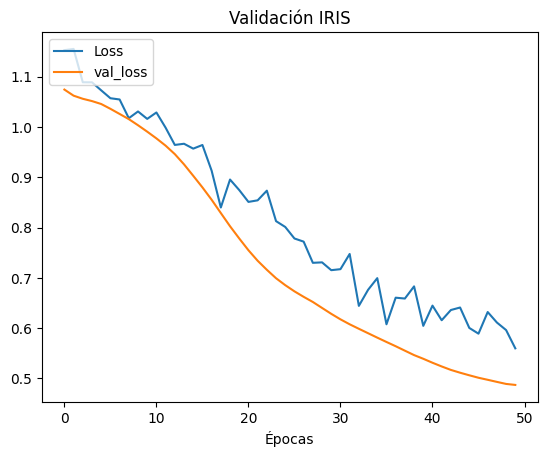

In [61]:
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Establecer semilla para reproducibilidad
seed = 42
tf.random.set_seed(seed)

# Cargar el dataset
FOLDER = 'datasets/'
FILE = 'iris.csv'
path = os.path.join(FOLDER, FILE)
df = pd.read_csv(path)

df = pd.get_dummies(df, columns=['Species'])

# Separar características y etiquetas
x = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
x = x.drop(['Id'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Normalizar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Separar los datos en entrenamiento, validación y prueba con una proporción de 60%, 20%, y 20% respectivamente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Construir el modelo con regularización Dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo con otro optimizador (Adam) y tasa de aprendizaje diferente
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Ajustar número de épocas y tamaño de lote
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Entrenamiento IRIS con Dropout y Adam')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()

# Imprimir la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Validación IRIS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")
plt.show()


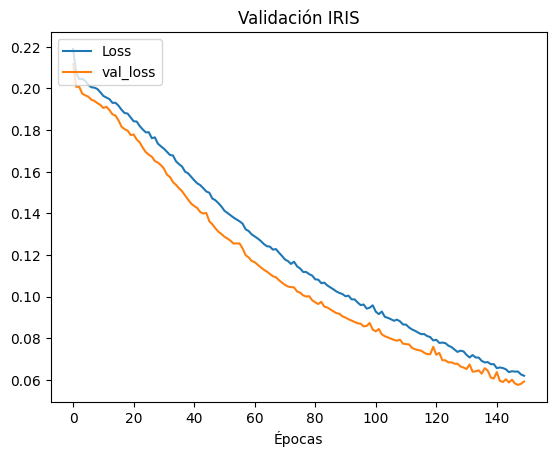

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                60        
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



### 2. Guardar solo la arquitectura o solo los pesos:

a. **Guardar la arquitectura**:

Puedes guardar la estructura del modelo (sin ningún peso) en formato JSON. Esto es útil sobre todo para temas de documentación o para replicar modelos en otros proyectos.

In [ ]:
# Guardar en formato JSON
json_string = model.to_json()

import json
print(json.dumps(json.loads(json_string), indent=2))

# Para cargar el modelo desde JSON
from keras.models import model_from_json
loaded_model = model_from_json(json_string)

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_4",
    "layers": [
      {
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "dtype": "float32",
          "sparse": false,
          "ragged": false,
          "name": "dense_8_input"
        }
      },
      {
        "class_name": "Dense",
        "config": {
          "name": "dense_8",
          "trainable": true,
          "dtype": "float32",
          "batch_input_shape": [
            null,
            4
          ],
          "units": 12,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "GlorotUniform",
            "config": {
              "seed": null
            },
            "registered_name": null
          },
          "bias_initializer": {
            "module": "keras.initializers",
           

b. **Guardar solo los pesos**:

Puedes guardar solo los pesos del modelo, esto es útil cuando veamos transfer learning.

In [ ]:
# Guardar los pesos del modelo
MODEL_WEIGHTS = 'iris_model_weights.h5'
path_to_save_weigths = os.path.join(FOLDER_TO_SAVE_MODELS, MODEL_WEIGHTS)

model.save_weights(path_to_save_weigths)

# Cargar los pesos en un modelo con la misma arquitectura
model.load_weights(path_to_save_weigths)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                60        
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Estos métodos te permiten guardar y cargar modelos en Keras de manera efectiva. Dependiendo de tus necesidades (por ejemplo, si deseas reutilizar solo la arquitectura del modelo en otro proyecto, o si necesitas guardar todo para reanudar el entrenamiento más tarde), puedes elegir el método que más te convenga.

## Producción
Una vez entrenada y testeada la red, podemos ponerla en producción. Si queremos hacer una clasifiación invocaremos el método predict del modelo.

Vamos a ver qué resultados nos ofrece la red si introducimos el conjunto de test.

In [ ]:
import numpy as np

# pass y_test to a numpy numerical array
y_test = np.array(y_test)

predictions = model.predict(x_test)
for p, l in zip(predictions, y_test):
    print(p, "->", l)
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")

1/1 [==============================] - 0s 67ms/step
[0.10168558 0.17974958 0.71856487] -> [False False  True]
[0.10168558 0.17974958 0.71856487] -> [False False  True]
[0.2210386 0.3417185 0.4372429] -> [False  True False]
[0.2210386 0.3417185 0.4372429] -> [False  True False] ✘
[0.27179492 0.45814383 0.2700612 ] -> [False  True False]
[0.27179492 0.45814383 0.2700612 ] -> [False  True False]
[0.0482586  0.0937223  0.85801905] -> [False False  True]
[0.0482586  0.0937223  0.85801905] -> [False False  True]
[0.1472941  0.26483747 0.58786845] -> [False  True False]
[0.1472941  0.26483747 0.58786845] -> [False  True False] ✘
[0.14999466 0.44340992 0.40659535] -> [False False  True]
[0.14999466 0.44340992 0.40659535] -> [False False  True] ✘
[0.23608556 0.43648463 0.32742977] -> [False  True False]
[0.23608556 0.43648463 0.32742977] -> [False  True False]
[0.27416185 0.43732768 0.2885104 ] -> [False  True False]
[0.27416185 0.43732768 0.2885104 ] -> [False  True False]
[0.60441774 0.305312